In [24]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

??Why is this important?
https://en.wikipedia.org/wiki/Cellular_deconvolution#:~:text=Cellular%20deconvolution%20(also%20referred%20to,samples%20collected%20from%20a%20tissue.


I started with Abbas because it felt like the most straightforward approach. Linear is better than quadradratic and, well my eyes always glaze over a bit when I see a methods paper with a 10 character acronym.

- "Changes in cell composition underlie diverse physiological states of metazoans and their complex tissues. For example, in malignant tumors, levels of infiltrating immune cells are associated with tumor growth, cancer progression and patient outcome1,2."
- "Common methods for studying cell heterogeneity, such as immunohistochemistry and flow cytometry, rely on a limited repertoire of phenotypic markers, and tissue disaggregation prior to flow cytometry can lead to lost or damaged cells, altering results3."


Three main papers:
Abbas et al. 2009
Gong et al. 2013
Newman et. 2015

In [25]:
cell_mixes = pd.read_csv('./data/cell_mixes.csv', index_col=0)
ground_truth = pd.read_csv('./data/ground_truth_proportions.csv', index_col=0)
signature_matrix = pd.read_csv('./data/signature_matrix.csv', index_col=0)

Signature matrix vs mixes normalization

- A leukocyte gene signature matrix

- https://en.wikipedia.org/wiki/Peripheral_blood_mononuclear_cell

"Negative SVR regression coefficients are subsequently set to zero (as done for LLSR), and the remaining regression coefficients are normalized to sum to 1, yielding a final vector of estimated cell type fractions, f (notably, f denotes relative, not absolute fractions of each cell type from B in m). To decrease running time and promote better overall performance, both B and m are each normalized to zero mean and unit variance prior to running CIBERSORT. As previously suggested for other linear deconvolution methods, CIBERSORT works best on expression values in non-log linear space20."

more normalization: 
https://www.nature.com/articles/s41467-020-19015-1

 what about quantile normalization?

# Analysis

The cell deconvolution problem is:
 ?? Talk about linearity assumption:

They constructed a signature matrix pre-selecting genes that are good discriminators based on 2-norm condition number

$$

SP = M

$$

where $S$ is a signature matrix of shape #genes x #cell types, $M$ is a matrix of bulk-RNAseq cell mixes (#genes X #mixes) $P$ is an unknown matrix of relative proportion coefficients (#cell types x #mixes).

This assumes that the mixes are a linear combinations of the cell types in the signature matrix. 

TODO: solving vs estimating OLS

To find be we solve the equation for $P$: 
$$
P = S^{-1}M
$$

In [26]:
cell_mixes

,17-002,17-006,17-019,17-023,17-026,17-027,17-030,17-034,17-040,17-041,17-042,17-043,17-045,17-047,17-054,17-055,17-057,17-058,17-060,17-061
Gene symbol,,,,,,,,,,,,,,,,,,,,
1-Dec,4.452567,4.435798,4.656208,4.321388,4.627161,4.415902,4.980467,4.675442,4.474974,4.425477,4.484522,4.384596,4.505567,4.395517,4.388416,4.658748,4.546335,5.059686,4.530609,4.507231
1-Mar,4.830207,4.769207,5.480087,4.583348,4.942648,5.364314,5.629021,4.932392,4.348351,4.827634,5.194868,4.703671,4.996184,4.791204,4.759568,5.398366,4.755092,5.192759,4.400029,4.528800
10-Mar,4.303527,4.421927,4.329707,4.432910,4.384596,4.433895,4.487012,4.703845,4.437103,4.504855,4.393994,4.312386,4.428056,4.393380,4.486116,4.427384,4.362404,4.466643,4.474173,4.423456
11-Mar,4.288270,4.421927,4.383325,4.546867,4.391662,4.481856,4.341878,4.362670,4.404913,4.554235,4.269191,4.374131,4.553221,4.535249,4.448680,4.364572,4.334962,4.489556,4.350821,4.336460
2-Mar,6.388000,5.741078,6.239270,6.115302,4.812703,6.372689,5.875830,5.767457,6.616678,5.661562,7.147335,6.317659,5.683952,5.763298,6.130149,6.418442,5.600742,5.881640,6.303694,6.018030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dJ341D10.1,6.116484,6.630463,5.241442,6.098752,6.020207,5.737062,5.725913,5.421266,6.188416,5.937603,5.895565,6.059639,6.317429,5.619879,6.603067,6.361038,5.960314,6.272865,6.246997,5.645493
gm127,5.032756,4.530694,4.673544,4.625115,4.965445,5.454948,4.664854,4.646377,4.527339,4.546335,4.575742,4.656371,4.764677,5.246751,4.554336,4.429834,4.962290,4.873171,5.273731,4.528800
psiTPTE22,4.706410,4.363098,4.412415,5.019570,4.477950,4.741854,4.812803,4.353338,4.701080,4.456819,4.429224,4.684271,4.706275,4.831688,4.624919,4.386794,4.412018,4.969849,4.975456,4.325037


In [27]:
# Only use genes that are measured in both cell mixes and the signature matrix
common_genes = list(signature_matrix.index.intersection(cell_mixes.index))
cell_mixes_common = cell_mixes.loc[common_genes]
signature_matrix_common = signature_matrix.loc[common_genes]

In [28]:
estimated_proportions = np.linalg.pinv(signature_matrix_common) @ cell_mixes_common
estimated_proportions.index = signature_matrix.columns

"Significantly differentially expressed genes between each population and all other populations were identified using a two-sided unequal variance t-test. Genes with a q-value < 0.3 (false discovery rate29) were considered significant."

In [29]:
for col in signature_matrix.columns:
    if col not in ground_truth.columns:
        ground_truth[col] = 0

assert ground_truth.columns.shape[0] == len(signature_matrix.columns)

"All methods were run in non-log linear space."

In [30]:
# TODO check this
estimated_proportions.columns = ground_truth.T.columns 
estimated_proportions[estimated_proportions < 0] = 0

In [33]:
estimated_proportions / estimated_proportions.sum()

Sample ID,17-002,17-006,17-019,17-023,17-026,17-027,17-030,17-034,17-040,17-041,17-042,17-043,17-045,17-047,17-054,17-055,17-057,17-058,17-060,17-061
B cells naive,0.083329,0.074913,0.090868,0.083410,0.072280,0.082953,0.065385,0.082351,0.085726,0.080978,0.062768,0.075863,0.088694,0.083280,0.079940,0.069444,0.080769,0.081931,0.079704,0.079130
B cells memory,0.000000,0.000000,0.000000,0.000000,0.006660,0.000000,0.009495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plasma cells,0.147988,0.143757,0.153551,0.142540,0.145582,0.149911,0.150614,0.145887,0.150490,0.150106,0.142729,0.154363,0.155826,0.157468,0.148808,0.147588,0.149601,0.154886,0.147810,0.150209
T cells CD8,0.101183,0.108336,0.094622,0.087283,0.107414,0.106027,0.099684,0.085351,0.094169,0.089939,0.089269,0.085554,0.095195,0.091701,0.090600,0.090618,0.115598,0.104303,0.104650,0.098064
T cells CD4 naive,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
T cells CD4 memory resting,0.037525,0.043161,0.037108,0.048373,0.030559,0.034637,0.042630,0.041580,0.034913,0.041014,0.042771,0.052328,0.045631,0.045142,0.048643,0.044994,0.035340,0.039608,0.049883,0.043581
T cells CD4 memory activated,0.075279,0.072786,0.065740,0.066847,0.070376,0.067706,0.069820,0.068605,0.072183,0.076750,0.071962,0.076185,0.071310,0.075830,0.072465,0.068083,0.068753,0.069963,0.075569,0.069878
T cells follicular helper,0.057854,0.064100,0.047086,0.064235,0.063979,0.061418,0.056310,0.060775,0.062845,0.060601,0.060776,0.059832,0.064701,0.062746,0.063364,0.056706,0.066040,0.066230,0.062795,0.064279
T cells regulatory (Tregs),0.033113,0.045401,0.038450,0.035465,0.035070,0.034417,0.035825,0.029629,0.038630,0.034267,0.032811,0.030248,0.028883,0.032173,0.039183,0.038911,0.042243,0.043180,0.034837,0.038773
T cells gamma delta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


"Negative coefficients from LLSR were set to zero to approximate the approach used by Abbas et al."

PearsonRResult(statistic=-0.010447535899647241, pvalue=0.9631955519926427)


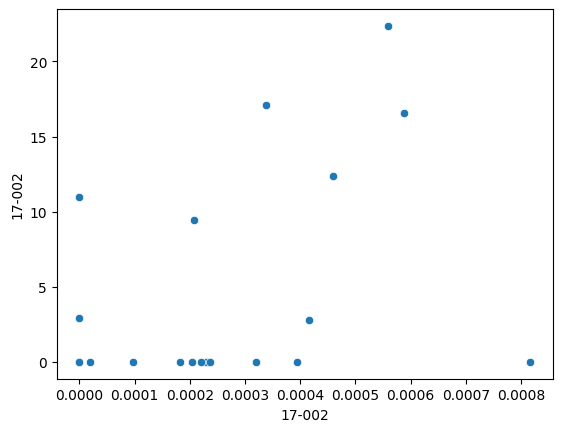

PearsonRResult(statistic=-0.022163662188425012, pvalue=0.9220115254008618)


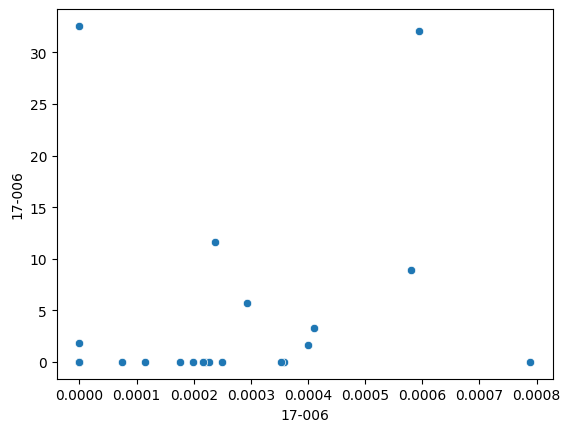

PearsonRResult(statistic=-0.18881998059462393, pvalue=0.40003646454673003)


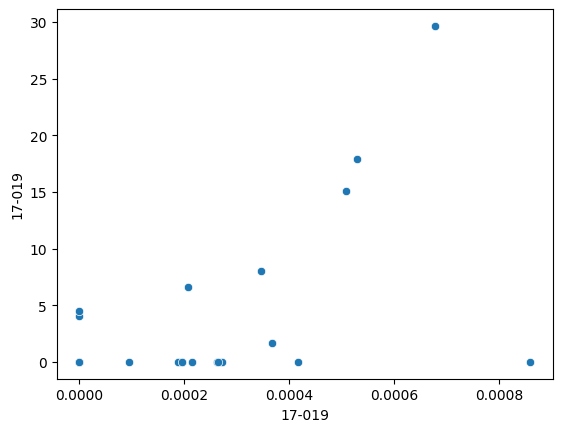

PearsonRResult(statistic=0.09690654995242827, pvalue=0.6679143126077844)


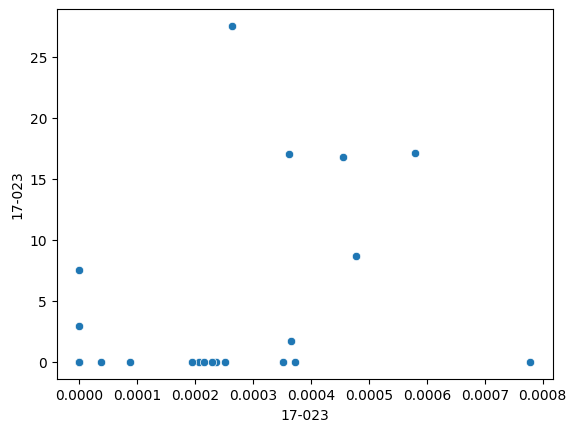

PearsonRResult(statistic=0.062770083020821, pvalue=0.7813919821348978)


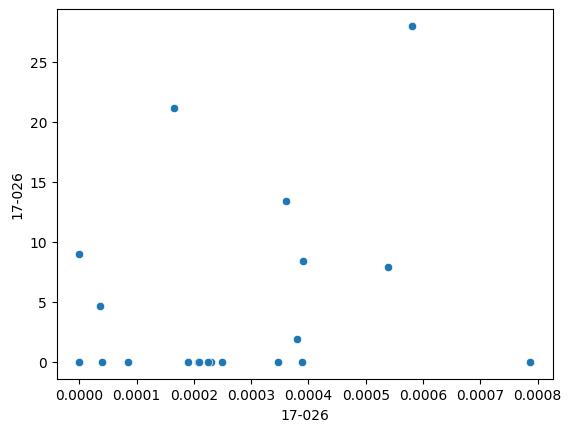

PearsonRResult(statistic=0.007223981892142909, pvalue=0.9745470987113168)


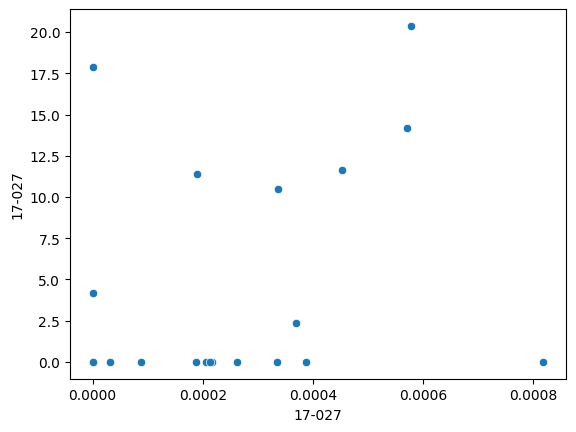

PearsonRResult(statistic=0.07950597173390365, pvalue=0.7250589956806113)


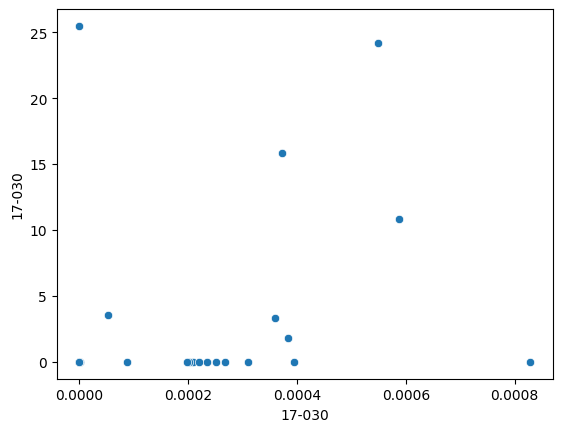

PearsonRResult(statistic=0.10707599988332912, pvalue=0.6352986509997843)


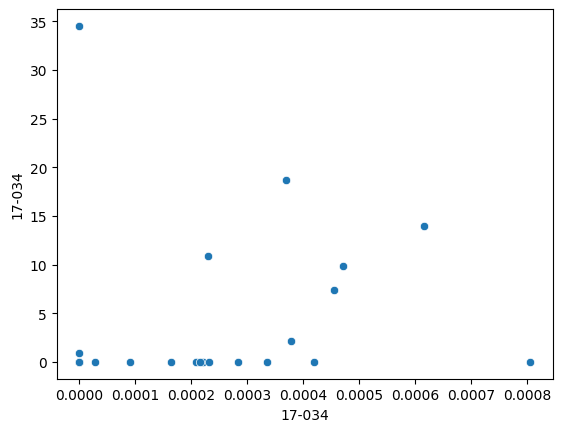

PearsonRResult(statistic=0.2613928737439674, pvalue=0.23997745728346717)


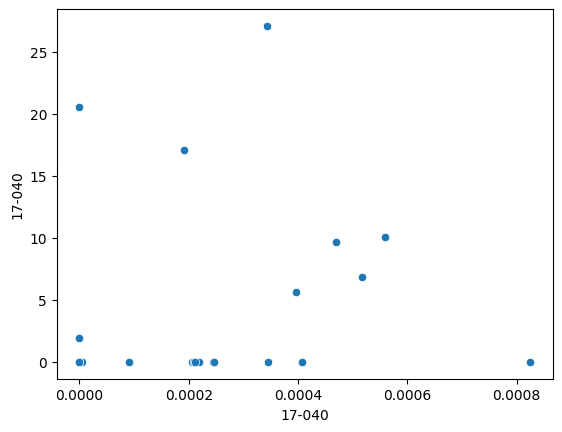

PearsonRResult(statistic=0.1620198877949971, pvalue=0.47130192946573424)


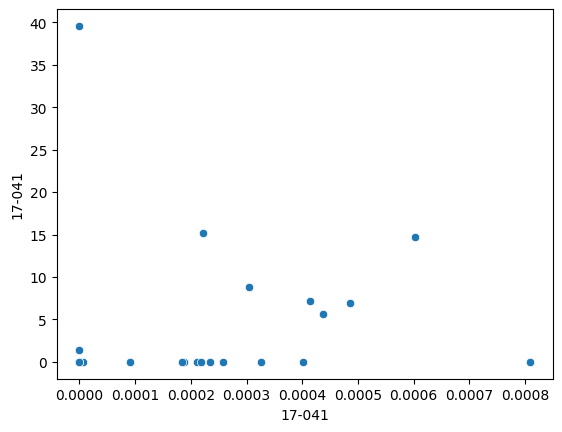

PearsonRResult(statistic=0.10510334758331921, pvalue=0.6415768742733332)


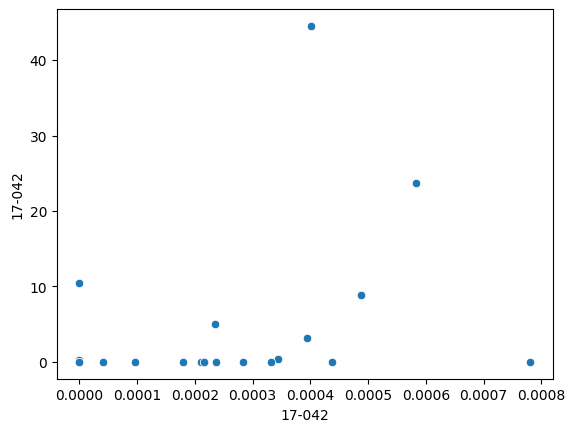

PearsonRResult(statistic=0.14199374998089206, pvalue=0.5284720900410702)


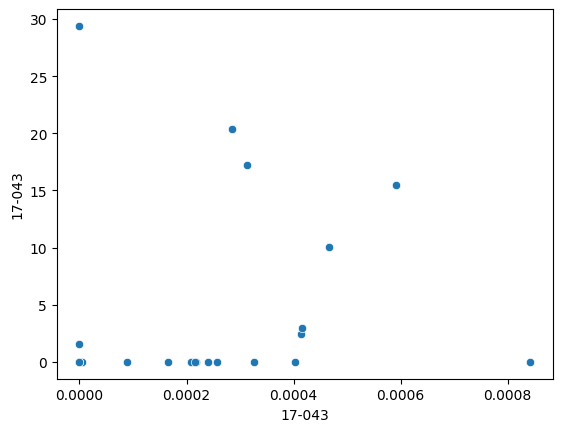

PearsonRResult(statistic=0.0876196447770389, pvalue=0.6982155577951761)


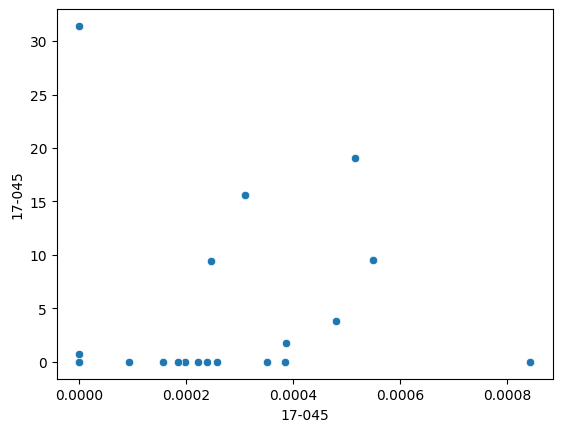

PearsonRResult(statistic=0.015439022714244903, pvalue=0.945632677339558)


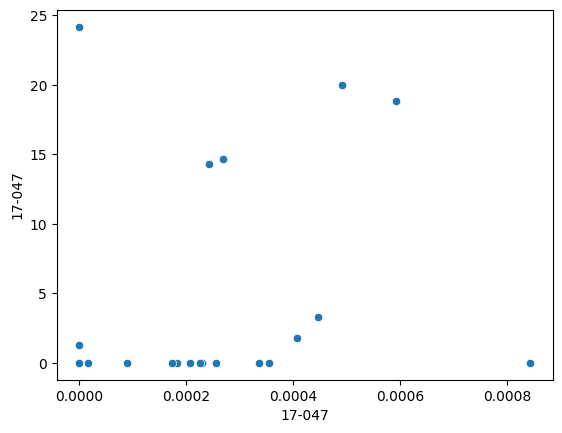

PearsonRResult(statistic=0.12798581566038694, pvalue=0.5703009152818109)


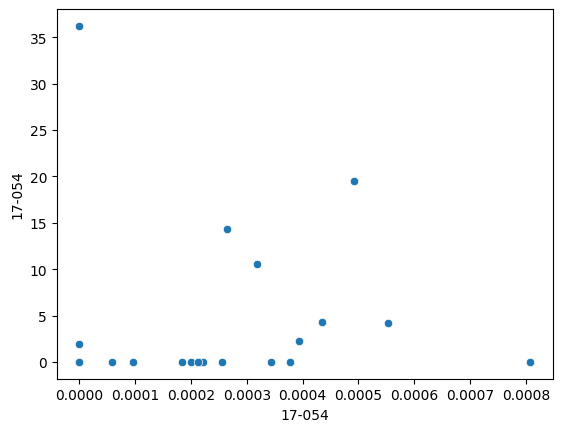

PearsonRResult(statistic=0.10105190589668765, pvalue=0.6545451474918227)


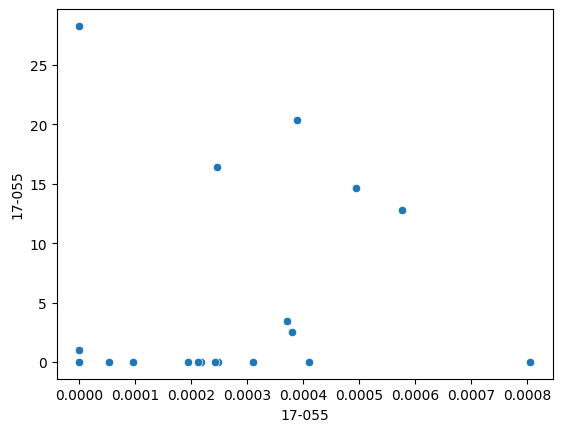

PearsonRResult(statistic=-0.07873072667967251, pvalue=0.7276408012376913)


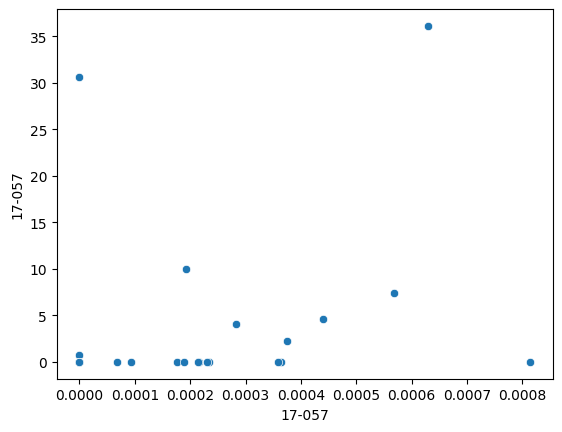

PearsonRResult(statistic=-0.04999430486811629, pvalue=0.8251361522507933)


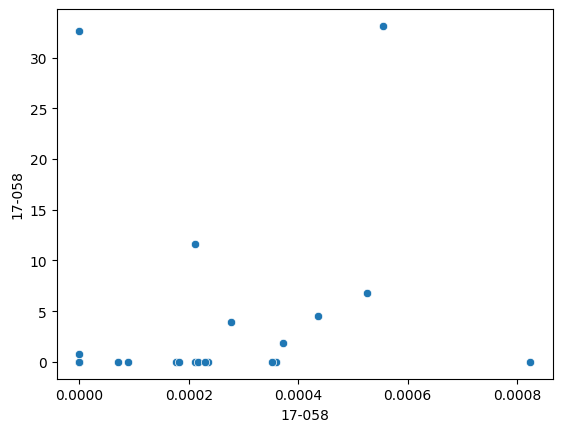

PearsonRResult(statistic=0.05496000536664209, pvalue=0.8080665750002263)


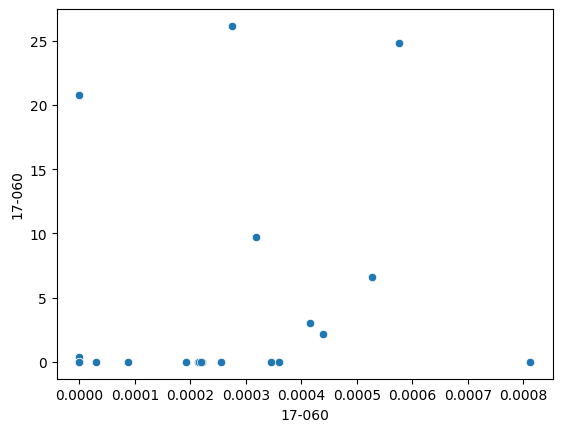

PearsonRResult(statistic=0.18817480159943148, pvalue=0.40167819620748313)


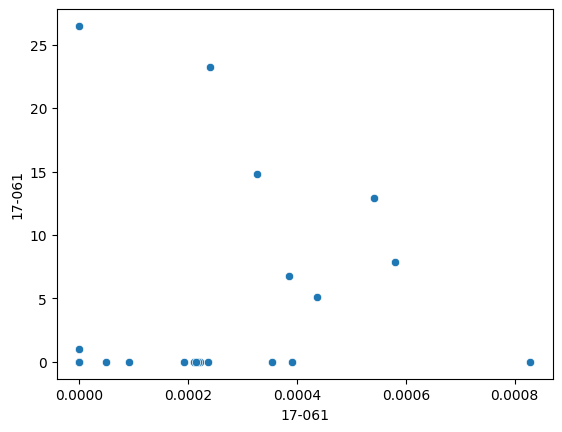

In [21]:
cors = []
for col in estimated_proportions.columns:
    p = estimated_proportions[col]
    g = ground_truth.T[col]
    print(sp.stats.pearsonr(p, g))
    sns.scatterplot(x=p, y=g)
    plt.show()
    cors.append(sp.stats.pearsonr(p, g))

- "While such methods perform accurately on distinct cell subsets in mixtures with well-defined composition (e.g., blood), they are considerably less effective for mixtures with unknown content and noise (e.g., solid tumors), and for discriminating closely related cell types (e.g., naïve vs. memory B cells)."
- Want a p-value and uncertainty
- Think about precision and recall (AUC) problem

## Further considerations

"The most significant current limitation of CIBERSORT, and indeed all signature gene-based methods, is the fidelity of reference profiles, which could deviate in cells undergoing heterotypic interactions, phenotypic plasticity, or disease-induced dysregulation. Sampling a larger expression space by sorting populations from diverse physiological conditions (e.g., specific tumor-infiltrating immune cells) may mitigate this issue. Second, CIBERSORT currently does not provide P values for detection limits of individual cell types. Third, despite a considerably lower estimation bias than other approaches, some cell types were systematically over- or under-estimated by CIBERSORT (see RMSE values in Supplementary Table 4); efforts to address this are underway. Finally, while CIBERSORT was not explicitly tested on RNA-Seq data, the linearity assumptions made by our method are likely to hold, as previously suggested [17]."

### SVR

- Since since individual genes are "features", SVR actually does a feature selection, since points within the $\epsilon$-tube are not penalized.
- good for noisy data: https://www.sciencedirect.com/science/article/abs/pii/S0893608003001692?via%3Dihub
- ridge penalty combats multicollinearity because it penalizes large coefficients
- $\nu$ method: choose number of support vectors instead of tube size. https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR

All this amounts to automatic feature selection, which allows for more broadly applicable signature matrices: 
"Moreover, CIBERSORT does not require cell type-specific expression patterns for every gene, allowing the construction of signature matrices with more cell types and phenotypic states than other methods"
https://www.nature.com/articles/nmeth.3337/figures/11

"Group comparisons were determined using a two-sided Wilcoxon test, unpaired or paired, as appropriate."